In [1]:
import pandas as pd
import glob
import os
from pandas_profiling import ProfileReport

# Main cleaning function

In [12]:
def clean_data(df):
    df.drop(columns=['created_utc'], inplace=True)
    df.drop(columns=['created'], inplace=True)
    df = df.astype({"body": str})
    df = df[df["body"].str.match("[deleted]") == False]
    df = df[df["body"].str.match("[removed]") == False]
    df = df[df["body"].str.contains("I am a bot, and this action was performed automatically") == False]
    df = df[df["body"].str.contains("Hello, your post was removed") == False]
    
    
    df['length'] = df['body'].apply(lambda x: len(x.split()))    
    df.drop(columns=['body'], inplace=True)
    return df

# Greed dataset STATS

In [25]:
path = r'data\greed' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, on_bad_lines='skip', header=0, engine='python', delimiter='|', index_col=False) for f in all_files), ignore_index=True)

In [26]:
df = df.astype({"body": str})
df['length'] = df['body'].apply(lambda x: len(x.split())) 

In [6]:
df["length"].describe().apply(lambda x: format(x, 'f'))

count    3084992.000000
mean          19.847671
std           28.707581
min            1.000000
25%            6.000000
50%           12.000000
75%           24.000000
max         1720.000000
Name: length, dtype: object

In [27]:
df = clean_data(df)

In [28]:
df["length"].describe().apply(lambda x: format(x, 'f'))

count    2894292.000000
mean          18.214493
std           28.157411
min            1.000000
25%            5.000000
50%           11.000000
75%           21.000000
max         1720.000000
Name: length, dtype: object

## Remove too short and too long posts 25-75%

In [29]:
df = df[(df.length >= 5) & (df.length<=21)]

In [30]:
df["length"].describe().apply(lambda x: format(x, 'f'))

count    1612975.000000
mean          11.145330
std            4.603789
min            5.000000
25%            7.000000
50%           10.000000
75%           15.000000
max           21.000000
Name: length, dtype: object

In [31]:
df["length"].value_counts().nlargest(5)

6    151735
5    149507
7    145023
8    135981
9    125711
Name: length, dtype: int64

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

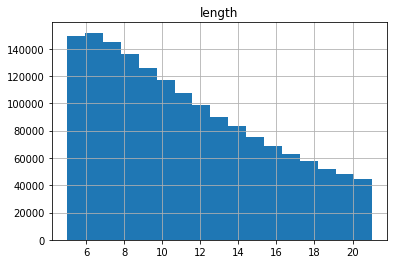

In [33]:
df.hist(bins=17)

# Fear dataset STATS

In [17]:
path = r'data\fear' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, on_bad_lines='skip', header=0, engine='python', delimiter='|', index_col=False) for f in all_files), ignore_index=True)

In [8]:
df = df.astype({"body": str})
df['length'] = df['body'].apply(lambda x: len(x.split())) 

In [9]:
df["length"].describe().apply(lambda x: format(x, 'f'))

count    1401208.000000
mean          22.964472
std           43.877997
min            1.000000
25%            6.000000
50%           13.000000
75%           26.000000
max         1759.000000
Name: length, dtype: object

In [18]:
df = clean_data(df)

In [19]:
df["length"].describe().apply(lambda x: format(x, 'f'))

count    1322036.000000
mean          21.547232
std           44.216340
min            1.000000
25%            6.000000
50%           12.000000
75%           23.000000
max         1759.000000
Name: length, dtype: object

In [20]:
df = df[(df.length >= 6) & (df.length<=23)]

In [21]:
df["length"].describe().apply(lambda x: format(x, 'f'))

count    709843.000000
mean         12.476560
std           4.851446
min           6.000000
25%           8.000000
50%          12.000000
75%          16.000000
max          23.000000
Name: length, dtype: object

In [22]:
df["length"].value_counts().nlargest(5)

6     64983
7     62989
8     60161
9     55666
10    52888
Name: length, dtype: int64

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

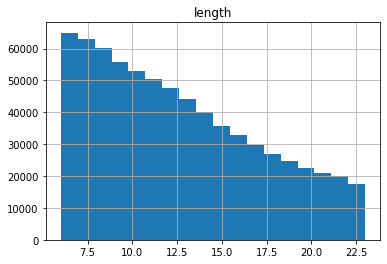

In [24]:
df.hist(bins=18)